# Credit Card Fraud Detection

In [2]:
# manipulation data

import pandas as pd
import numpy as np
import math
import random
import re
import json
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer, MultiLabelBinarizer,StandardScaler,LabelEncoder
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib as mpl
import scipy as sp
import itertools 
import warnings 
warnings.filterwarnings('ignore')

# machine learning 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [3]:
# Loading the data
main_df = pd.read_csv("archive/fraudTrain.csv")
test_df = pd.read_csv("archive/fraudTest.csv")
main_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
main_df.drop("Unnamed: 0",axis=1,inplace=True)
test_df.drop("Unnamed: 0",axis=1,inplace=True)
main_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
# sampling the data 
main_df.sample(5)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
509014,2019-08-09 02:35:06,571365235126,fraud_Sporer Inc,gas_transport,43.91,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,Elberta,...,44.5995,-86.2141,372,"Exhibitions officer, museum/gallery",1995-07-12,eb2dd93988cfc8d25cc3888c74aa7cad,1344479706,44.189702,-86.757037,0
1011456,2020-02-21 02:03:21,2383461948823908,"fraud_Goldner, Kovacek and Abbott",grocery_pos,106.68,Patrick,Vaughan,M,651 Miller Common,Parsonsfield,...,43.7450,-70.9092,1892,Audiological scientist,1956-03-02,8dd58e0b01634c3607e07871fb4abacf,1361412201,43.646257,-71.301242,0
542679,2019-08-20 08:35:57,2712209726293386,fraud_Bailey-Morar,grocery_pos,224.06,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,...,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,8c2adfbedcd5f1842f6d23e851dc99fc,1345451757,30.876916,-90.450890,0
426307,2019-07-10 12:15:26,6011366578560244,fraud_Kerluke-Abshire,shopping_net,9.15,Adam,Stark,M,0912 Mark Fields Apt. 080,Mc Veytown,...,40.5046,-77.7186,4653,Nutritional therapist,1997-07-01,0e7e0056a9387fefb3a4802bd6ea15a5,1341922526,41.178838,-78.399553,0
916091,2019-12-30 00:58:58,30551643947183,fraud_Simonis-Prohaska,misc_pos,229.75,Morgan,Smith,F,1441 Bradley Place,Grover,...,35.1836,-81.4552,5621,Toxicologist,1973-11-14,dff5c112bd22433bca14836815be3b94,1356829138,35.035593,-81.246366,0


In [6]:
# checking the shape of the dataset
main_df.shape

(1296675, 22)

In [7]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [8]:
# checking for the datatypes 
main_df.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

## Data Cleaning

In [9]:
# 1.checking for missing values
main_df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
# check for missing data
missing_values=main_df.isnull().sum()
percent_missing = main_df.isnull().sum()/main_df.shape[0]*100

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
trans_date_trans_time,0,0.0
cc_num,0,0.0
merchant,0,0.0
category,0,0.0
amt,0,0.0
first,0,0.0
last,0,0.0
gender,0,0.0
street,0,0.0
city,0,0.0


The dataset shows completeness as it has no missing values

In [11]:
# 2.Checking for duplicates
main_df.duplicated().sum()

0

In [12]:
# check if there any duplicated data for train
duplicate_1 = main_df[main_df.duplicated()]
if duplicate_1.empty== True:
    print("no duplicated data")
else:
    print("Duplicate Rows except first occurrence based on all columns are :")
    print(duplicate_1)

no duplicated data


The dataset has no duplicate values

<AxesSubplot:>

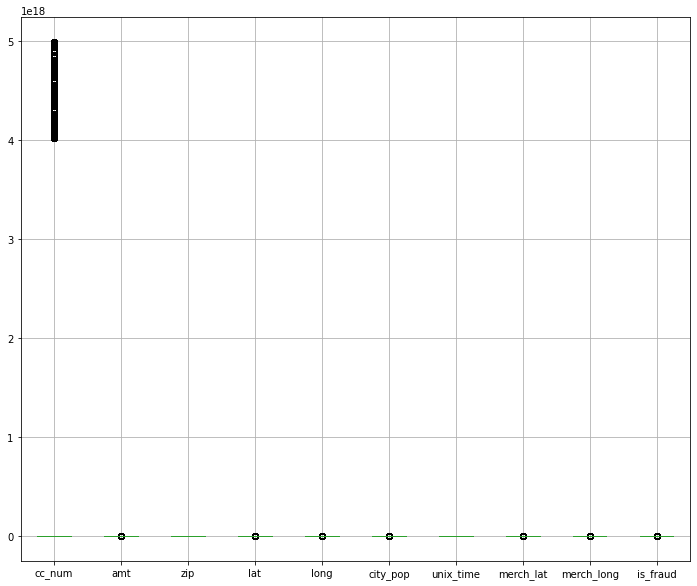

In [13]:
# 3. Checking for outliers 
main_df.boxplot(figsize=(12,10))

The dataset has no outliers for a majority of the columns apart from the cc_num column

<AxesSubplot:>

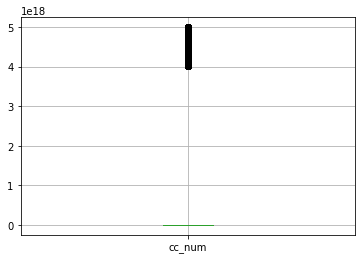

In [14]:
main_df[['cc_num']].boxplot()

In [15]:
# dealing with outliers
def check_deal_outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    print('Lower bound: ', lower_bound)
    print('Upper bound: ', upper_bound)
    print('Number of outliers: ', df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0])
    print('Percentage of outliers: ', df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0] / df.shape[0])
    print('Number of values within bounds: ', df[(df[col] >= lower_bound) & (df[col] <= upper_bound)].shape[0])
    print('Percentage of values within bounds: ', df[(df[col] >= lower_bound) & (df[col] <= upper_bound)].shape[0] / df.shape[0])
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

main_df = check_deal_outlier(main_df, 'cc_num')

Lower bound:  -6513275846701038.0
Upper bound:  1.133557426847813e+16
Number of outliers:  118789
Percentage of outliers:  0.09161046522837257
Number of values within bounds:  1177886
Percentage of values within bounds:  0.9083895347716274


In [16]:
# 4. Checking for skewness
main_df.skew()

cc_num         0.237138
amt           43.671834
zip            0.101705
lat           -0.091407
long          -1.067024
city_pop       5.620853
unix_time      0.003706
merch_lat     -0.089303
merch_long    -1.064155
is_fraud      13.009112
dtype: float64

In [17]:
main_df.dtypes

trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [18]:
# Renaming the columns
main_df.rename(columns={'amt':'amount','first':'first_name','last':'last_name','merchant':'merchant_name','category':'merchant_category','job':'job_title','dob':'date_of_birth','unix_time':'unix_time_trans'},inplace=True)

In [19]:
main_df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant_name', 'merchant_category',
       'amount', 'first_name', 'last_name', 'gender', 'street', 'city',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job_title', 'date_of_birth',
       'trans_num', 'unix_time_trans', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [20]:
#  ensuring the correct datatypes for the columns
main_df['trans_date_trans_time'] = pd.to_datetime(main_df['trans_date_trans_time'])
main_df['merchant_category'] = main_df['merchant_category'].astype('category')
main_df['gender'] = main_df['gender'].astype('category')
main_df['street'] = main_df['street'].astype('category')
main_df['state'] = main_df['state'].astype('category')
main_df['job_title'] = main_df['job_title'].astype('category')
main_df['date_of_birth'] = pd.to_datetime(main_df['date_of_birth'])
main_df['is_fraud'] = main_df['is_fraud'].astype('category')
main_df['city'] = main_df['city'].astype('category')

In [21]:
info = pd.DataFrame(main_df.dtypes)
info

,0
trans_date_trans_time,datetime64[ns]
cc_num,int64
merchant_name,object
merchant_category,category
amount,float64
first_name,object
last_name,object
gender,category
street,category
city,category


## Expanatory Data analysis

In [22]:
sns.set_style('darkgrid')

In [23]:
main_df.is_fraud.value_counts()

0    1171047
1       6839
Name: is_fraud, dtype: int64

<AxesSubplot:xlabel='is_fraud', ylabel='count'>

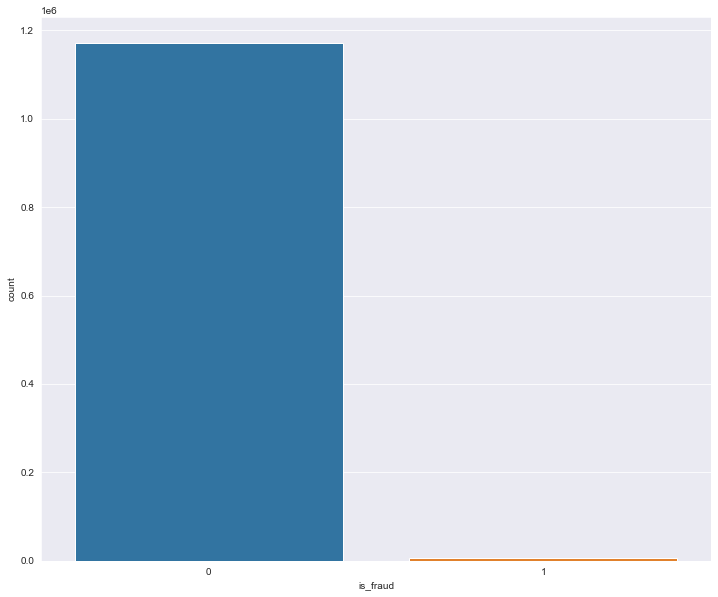

In [24]:
# visualizing the target column
fig ,ax = plt.subplots(figsize=(12,10))
sns.countplot(main_df.is_fraud,ax=ax)

<AxesSubplot:xlabel='gender', ylabel='count'>

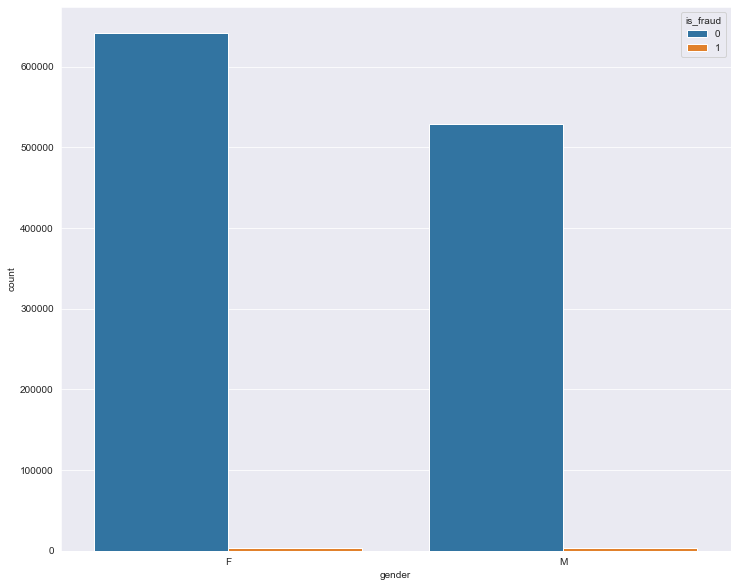

In [25]:
# plotting of gender vs is_fraud
fig , ax = plt.subplots(figsize=(12,10))
sns.countplot(x='gender',data=main_df,hue='is_fraud',ax=ax)

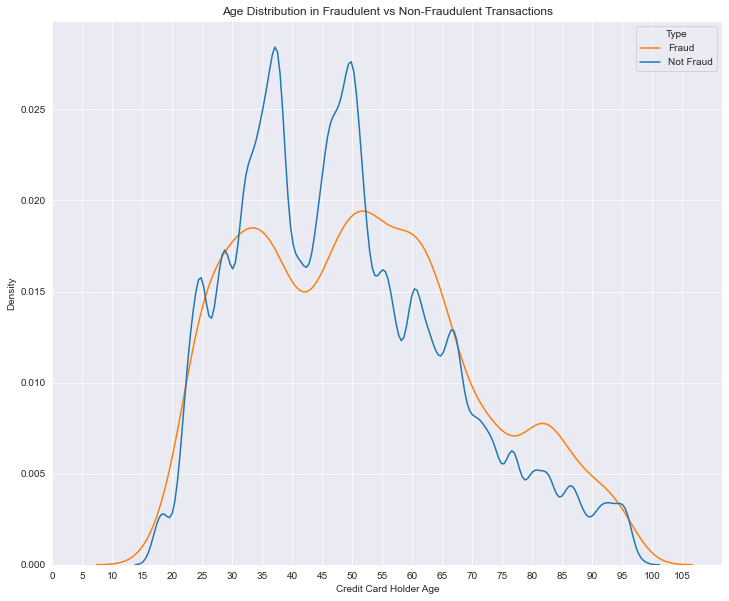

In [26]:
#age vs fraud
import datetime as dt

fig , ax = plt.subplots(figsize=(12,10))
main_df['age']=dt.date.today().year-pd.to_datetime(main_df['date_of_birth']).dt.year
ax=sns.kdeplot(x='age',data=main_df, hue='is_fraud', common_norm=False,ax=ax)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'entertainment'),
  Text(1, 0, 'food_dining'),
  Text(2, 0, 'gas_transport'),
  Text(3, 0, 'grocery_net'),
  Text(4, 0, 'grocery_pos'),
  Text(5, 0, 'health_fitness'),
  Text(6, 0, 'home'),
  Text(7, 0, 'kids_pets'),
  Text(8, 0, 'misc_net'),
  Text(9, 0, 'misc_pos'),
  Text(10, 0, 'personal_care'),
  Text(11, 0, 'shopping_net'),
  Text(12, 0, 'shopping_pos'),
  Text(13, 0, 'travel')])

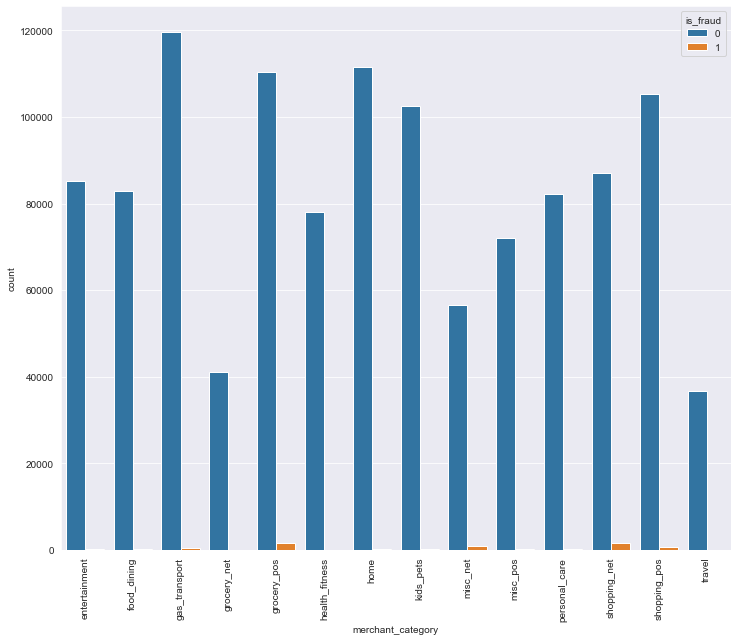

In [27]:
# merchant category vs fraud
fig , ax = plt.subplots(figsize=(12,10))
sns.countplot(x='merchant_category',data=main_df,hue='is_fraud',ax=ax)
plt.xticks(rotation=90)


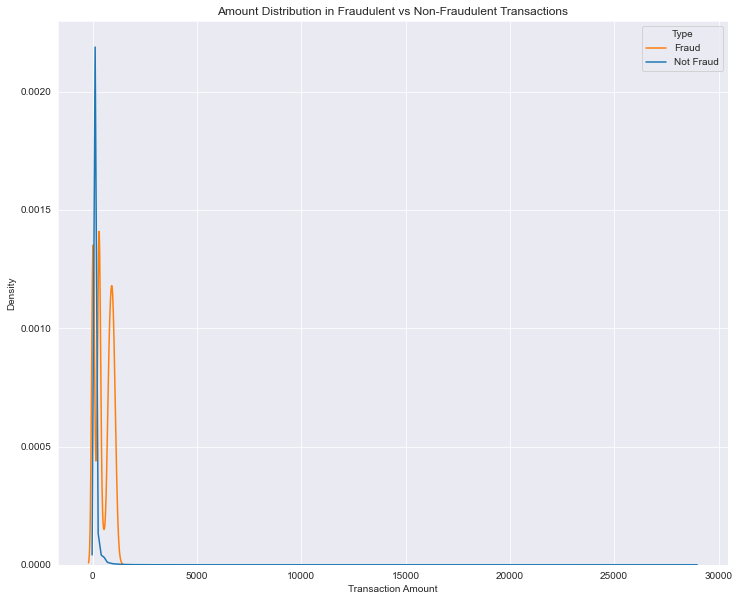

In [28]:
# amount vs fraud
fig , ax = plt.subplots(figsize=(12,10))
sns.kdeplot(x='amount',data=main_df, hue='is_fraud', common_norm=False,ax=ax)
ax.set_xlabel('Transaction Amount')
ax.set_ylabel('Density')
plt.title('Amount Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

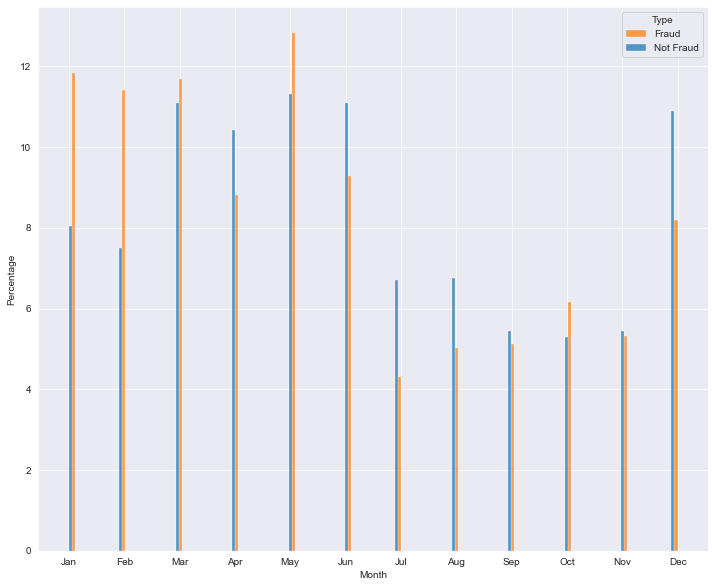

In [29]:
# create month column 
# compare month vs fraud
fig, ax = plt.subplots(figsize=(12,10))
main_df['month']=pd.to_datetime(main_df['trans_date_trans_time']).dt.month
ax=sns.histplot(data=main_df, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge',ax=ax)
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

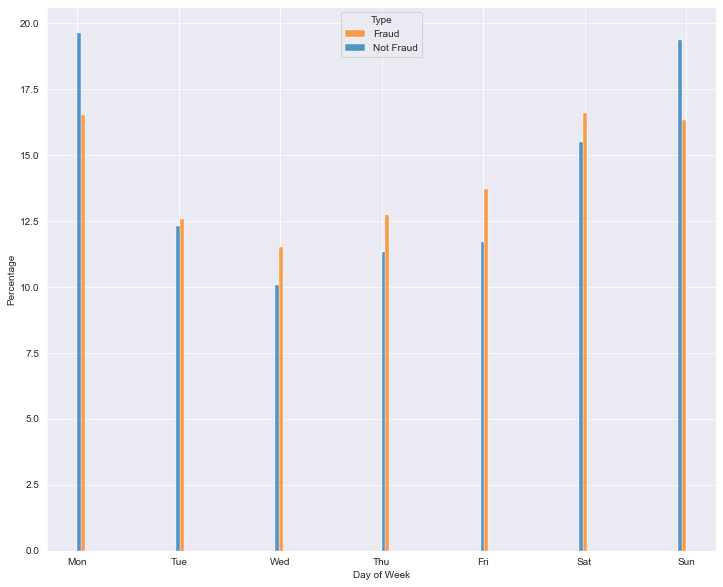

In [30]:
# create day column
# day of week vs fraud
fig, ax = plt.subplots(figsize=(12,10))
main_df['day']=pd.to_datetime(main_df['trans_date_trans_time']).dt.dayofweek
sns.histplot(data=main_df, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge',ax=ax)
ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

<AxesSubplot:xlabel='state', ylabel='count'>

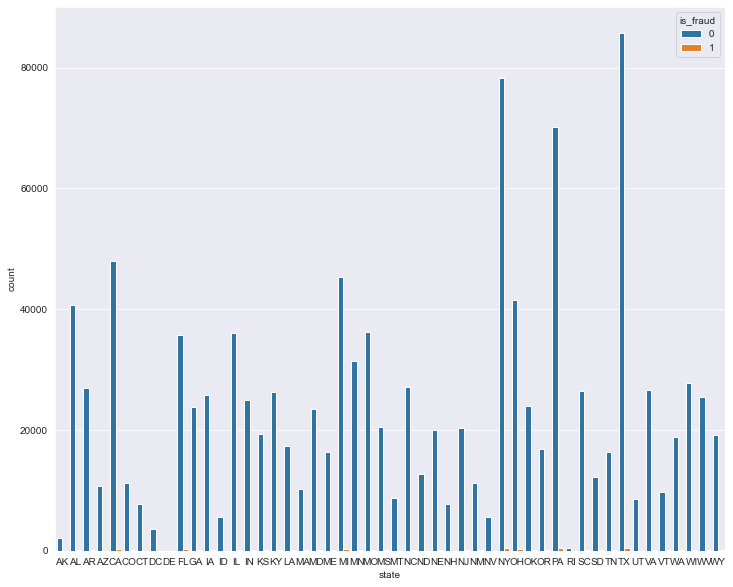

In [31]:
# states vs fraud
fig , ax = plt.subplots(figsize=(12,10))
sns.countplot(x='state',data=main_df,hue='is_fraud',ax=ax)


In [32]:
main_df.corr()

,cc_num,amount,zip,lat,long,city_pop,unix_time_trans,merch_lat,merch_long,age,month,day
cc_num,1.000000,0.001529,0.004806,0.020999,-0.005407,0.004108,0.002588,0.020801,-0.005422,-0.045360,0.001269,0.000420
amount,0.001529,1.000000,0.001916,-0.002634,-0.000547,0.005512,-0.000769,-0.002570,-0.000525,-0.009272,-0.001427,-0.001397
zip,0.004806,0.001916,1.000000,-0.099968,-0.917270,0.069685,0.000568,-0.099275,-0.916399,0.019638,0.001289,-0.001213
lat,0.020999,-0.002634,-0.099968,1.000000,-0.051365,-0.155385,0.001051,0.993488,-0.051281,0.053734,-0.000469,0.000309
long,-0.005407,-0.000547,-0.917270,-0.051365,1.000000,-0.046302,-0.000421,-0.051097,0.999075,-0.048561,-0.001527,0.001493
city_pop,0.004108,0.005512,0.069685,-0.155385,-0.046302,1.000000,-0.001687,-0.154450,-0.046266,-0.099754,-0.000019,0.002368
unix_time_trans,0.002588,-0.000769,0.000568,0.001051,-0.000421,-0.001687,1.000000,0.000950,-0.000417,-0.003566,0.184976,-0.029498
merch_lat,0.020801,-0.002570,-0.099275,0.993488,-0.051097,-0.154450,0.000950,1.000000,-0.051019,0.053339,-0.000513,0.000075
merch_long,-0.005422,-0.000525,-0.916399,-0.051281,0.999075,-0.046266,-0.000417,-0.051019,1.000000,-0.048475,-0.001522,0.001467
age,-0.045360,-0.009272,0.019638,0.053734,-0.048561,-0.099754,-0.003566,0.053339,-0.048475,1.000000,0.002251,-0.012093


<AxesSubplot:>

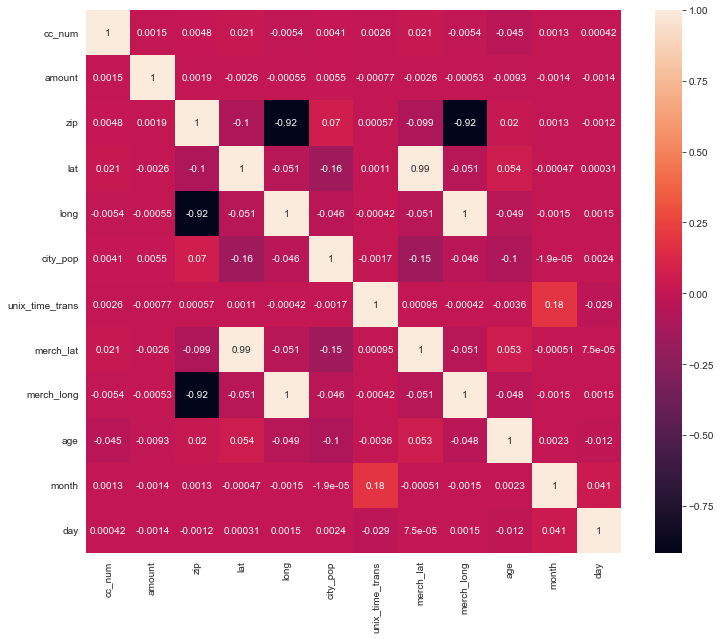

In [33]:
# heatmap 
fig , ax = plt.subplots(figsize=(12,10))
sns.heatmap(main_df.corr(),annot=True,ax=ax)

## Data Preparation

### Feature Engineering

In [34]:
# dealing with the categorical columns and label encoding them
def label_encoder(df,col):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    return df

for col in main_df.select_dtypes('category'):
    main_df = label_encoder(main_df,col)

main_df.head()

,trans_date_trans_time,cc_num,merchant_name,merchant_category,amount,first_name,last_name,gender,street,city,...,job_title,date_of_birth,trans_num,unix_time_trans,merch_lat,merch_long,is_fraud,age,month,day
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",8,4.97,Jennifer,Banks,0,522,485,...,353,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,34,1,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",4,107.23,Stephanie,Gill,0,395,564,...,408,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,44,1,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,0,220.11,Edward,Sanchez,1,551,433,...,294,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,60,1,1
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",2,45.00,Jeremy,White,1,842,77,...,314,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,55,1,1
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,9,41.96,Tyler,Garcia,1,379,197,...,110,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,36,1,1


## Feature Scaling 

In [35]:
# standardizing the numerical columns
def standardize(df,col):
    scaler = StandardScaler()
    df[col] = scaler.fit_transform(df[[col]])
    return df

for col in main_df.select_dtypes('float64','int64'):
    main_df = standardize(main_df,col)

main_df.head()

,trans_date_trans_time,cc_num,merchant_name,merchant_category,amount,first_name,last_name,gender,street,city,...,job_title,date_of_birth,trans_num,unix_time_trans,merch_lat,merch_long,is_fraud,age,month,day
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",8,-0.404568,Jennifer,Banks,0,522,485,...,353,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,-0.517184,0.591607,0,34,1,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",4,0.229144,Stephanie,Gill,0,395,564,...,408,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,2.076801,-2.097623,0,44,1,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,0,0.928670,Edward,Sanchez,1,551,433,...,294,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,0.891385,-1.648751,0,60,1,1
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",2,-0.156500,Jeremy,White,1,842,77,...,314,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,1.657605,-1.679008,0,55,1,1
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,9,-0.175339,Tyler,Garcia,1,379,197,...,110,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,0.008351,0.845799,0,36,1,1


## Feature Selection

In [36]:
main_df.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant_name                    object
merchant_category                 int64
amount                          float64
first_name                       object
last_name                        object
gender                            int64
street                            int64
city                              int64
state                             int64
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job_title                         int64
date_of_birth            datetime64[ns]
trans_num                        object
unix_time_trans                   int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
age                               int64
month                             int64
day                               int64


In [37]:
# dropping the columns that are not needed

main_df.drop(['trans_date_trans_time','merchant_name','first_name','last_name','date_of_birth','trans_num'],axis=1,inplace=True)

In [38]:
main_df.columns

Index(['cc_num', 'merchant_category', 'amount', 'gender', 'street', 'city',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job_title',
       'unix_time_trans', 'merch_lat', 'merch_long', 'is_fraud', 'age',
       'month', 'day'],
      dtype='object')

In [39]:
main_df.shape

(1177886, 19)

[0.02195936 0.16888629 0.38893091 0.01052865 0.02256011 0.02179741
 0.01418198 0.01871538 0.01984498 0.0189043  0.0336543  0.02206862
 0.06374195 0.04475696 0.04564268 0.03392769 0.02648842 0.02340999]


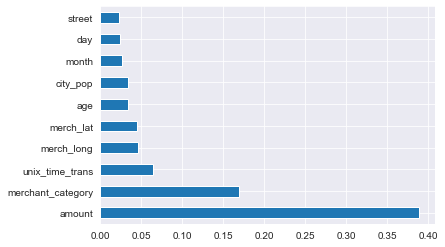

In [40]:
# feature selection
X = main_df.drop('is_fraud',axis=1)
y = main_df['is_fraud']

# feature importance
model = RandomForestClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [41]:
main_df.columns

Index(['cc_num', 'merchant_category', 'amount', 'gender', 'street', 'city',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job_title',
       'unix_time_trans', 'merch_lat', 'merch_long', 'is_fraud', 'age',
       'month', 'day'],
      dtype='object')

In [42]:
# dropping columns not selected 
main_df.drop(['cc_num','zip','lat','long'],axis=1,inplace=True)

In [43]:
main_df.shape

(1177886, 15)

### Dealing with class imbalance

In [44]:
# splitting the data into train and test

from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
# dealing with class imbalance
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)


## Map Reduce with mrjob

In [9]:
from mrjob.job import MRJob
from mrjob.step import MRStep
from mrjob.protocol import JSONValueProtocol, RawValueProtocol

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve


### 1. Logistic Regression

In [57]:
# Logistic Regression model training

log_reg = LogisticRegression()
log_reg.fit(X_train_resampled,y_train_resampled)
y_pred = log_reg.predict(X_test)

Logistic Regression
Accuracy:  0.005649933355406702
Precision:  0.005649933355406702
Recall:  1.0
F1 Score:  0.011236381901911703
ROC AUC Score:  0.5
Confusion Matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f9592a372b0>
ROC Curve:  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f959331bb80>


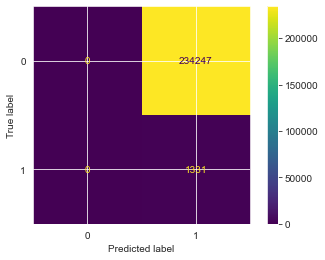

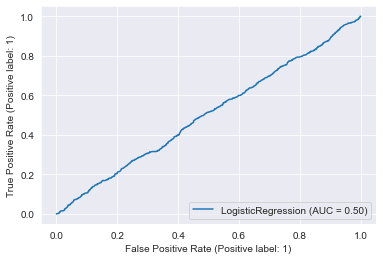

In [58]:
# Evaluation
print('Logistic Regression')
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred))
print('Recall: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))
print('ROC AUC Score: ',roc_auc_score(y_test,y_pred))
print('Confusion Matrix: ',plot_confusion_matrix(log_reg,X_test,y_test))
print('ROC Curve: ',plot_roc_curve(log_reg,X_test,y_test))

The logistic regression model performed poorly with ROC AUC score of 0.5 which is the same as a random guess

### 2. Decision Tree

In [59]:
# Decision Tree

dt = DecisionTreeClassifier()
dt.fit(X_train_resampled,y_train_resampled)
y_pred = dt.predict(X_test)


Decision Tree
Accuracy:  0.9816069412254116
Precision:  0.20672137553731926
Recall:  0.7948910593538693
F1 Score:  0.32811288571871605
ROC AUC Score:  0.8887794635160019
Confusion Matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f959256ef70>
ROC Curve:  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f9598593310>


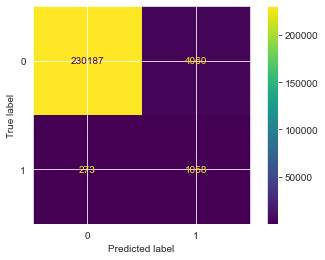

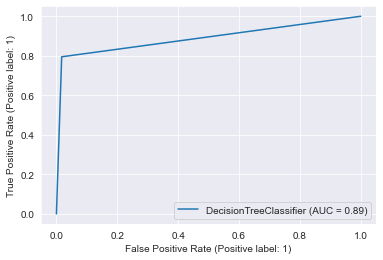

In [62]:
# Evaluation
print('Decision Tree')
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred))
print('Recall: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))
print('ROC AUC Score: ',roc_auc_score(y_test,y_pred))
print('Confusion Matrix: ',plot_confusion_matrix(dt,X_test,y_test))
print('ROC Curve: ',plot_roc_curve(dt,X_test,y_test))

The decision tree model performed better with an improved ROC AUC score of 0.89 however it is still not a good enough as precision is too low

### 3. Random Forest

In [63]:
# random forest

rf = RandomForestClassifier()
rf.fit(X_train_resampled,y_train_resampled)
y_pred = rf.predict(X_test)


Random Forest
Accuracy:  0.9965658932497942
Precision:  0.6673076923076923
Recall:  0.7821187077385424
F1 Score:  0.7201660325147007
ROC AUC Score:  0.8899515488600288
Confusion Matrix:
ROC Curve:  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f955b35dbb0>


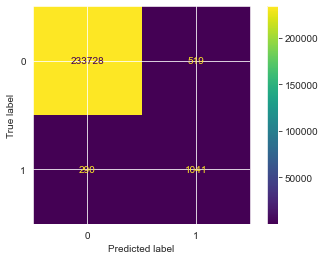

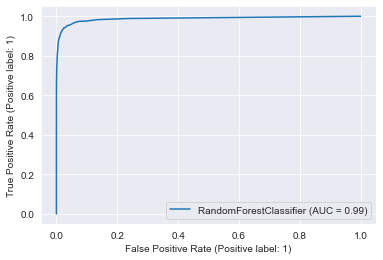

In [64]:
# Evaluation
print('Random Forest')
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred))
print('Recall: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))
print('ROC AUC Score: ',roc_auc_score(y_test,y_pred))
print('Confusion Matrix:\n ',plot_confusion_matrix(rf,X_test,y_test))
print('ROC Curve: ',plot_roc_curve(rf,X_test,y_test))

The Random forest model performed better with an improved ROC AUC score of 0.99 with acceptable precision and recall

### 4. XGBoost

In [65]:
# XGBoost

xgb = XGBClassifier()
xgb.fit(X_train_resampled,y_train_resampled)
y_pred = xgb.predict(X_test)


XGBoost
Accuracy:  0.9871125487099814
Precision:  0.2943305186972256
Recall:  0.9166040570999249
F1 Score:  0.44558071585098624
ROC AUC Score:  0.9520586188157929
Confusion Matrix:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f95909360a0>
ROC Curve:  <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f959258dc10>


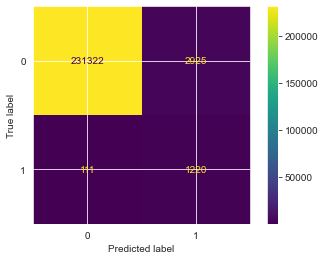

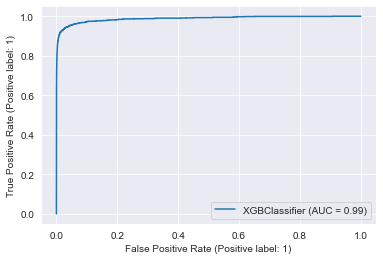

In [66]:
# Evaluation
print('XGBoost')
print('Accuracy: ',accuracy_score(y_test,y_pred))
print('Precision: ',precision_score(y_test,y_pred))
print('Recall: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))
print('ROC AUC Score: ',roc_auc_score(y_test,y_pred))
print('Confusion Matrix: ',plot_confusion_matrix(xgb,X_test,y_test))
print('ROC Curve: ',plot_roc_curve(xgb,X_test,y_test))

The XGBoost model performed better with an improved ROC AUC score of 0.95 however it is still not a good enough as precision is too low

## Modelling with Map Reduce

In [ ]:
from mrjob.job import MRJob
from mrjob.step import MRStep
from mrjob.protocol import JSONValueProtocol, RawValueProtocol

<p> mrjob is the easiest route to writing Python programs that run on Hadoop. If you use mrjob, you’ll be able to test your
code locally without installing Hadoop or run it on a cluster of your choice.
Additionally, mrjob has extensive integration with Amazon Elastic MapReduce. Once you’re set up, it’s as easy to run
your job in the cloud as it is to run it on your laptop. </p>

In [ ]:
class FraudDetection(MRJob):
    OUTPUT_PROTOCOL = JSONValueProtocol

    def steps(self):
        return [
            MRStep(mapper=self.mapper,
                   reducer=self.reducer),
            MRStep(reducer=self.reducer_final)
        ]
    
    def mapper(self, _, line):
        yield 'data', line.split(',')
        
    def reducer(self, key, values):
        df = pd.DataFrame(values)
        df.columns = df.iloc[0]
        df = df.iloc[1:]
        df = df.astype({'is_fraud': 'int64'})
        df
        X = df.drop('is_fraud',axis=1)
        y = df['is_fraud']
        X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
        sm = SMOTE(random_state=42)
        X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
        # Logistic Regression
        lr = LogisticRegression()
        lr.fit(X_train_resampled, y_train_resampled)
        y_pred_lr = lr.predict(X_test)
        # Decision Tree
        dt = DecisionTreeClassifier()
        dt.fit(X_train_resampled, y_train_resampled)
        y_pred_dt = dt.predict(X_test)
        # Random Forest
        rf = RandomForestClassifier()
        rf.fit(X_train_resampled, y_train_resampled)
        y_pred_rf = rf.predict(X_test)
        # XGBoost
        xgb = XGBClassifier()
        xgb.fit(X_train_resampled, y_train_resampled)
        y_pred_xgb = xgb.predict(X_test)
        # Accuracy
        accuracy_lr = accuracy_score(y_test, y_pred_lr)
        accuracy_dt = accuracy_score(y_test, y_pred_dt)
        accuracy_rf = accuracy_score(y_test, y_pred_rf)
        accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
        # Precision
        precision_lr = precision_score(y_test, y_pred_lr)
        precision_dt = precision_score(y_test, y_pred_dt)
        precision_rf = precision_score(y_test, y_pred_rf)
        precision_xgb = precision_score(y_test, y_pred_xgb)
        # Recall
        recall_lr = recall_score(y_test, y_pred_lr)
        recall_dt = recall_score(y_test, y_pred_dt)
        recall_rf = recall_score(y_test, y_pred_rf)
        recall_xgb = recall_score(y_test, y_pred_xgb)
        # F1 Score
        f1_lr = f1_score(y_test, y_pred_lr)
        f1_dt = f1_score(y_test, y_pred_dt)
        f1_rf = f1_score(y_test, y_pred_rf)
        f1_xgb = f1_score(y_test, y_pred_xgb)
        # ROC AUC Score
        roc_auc_lr = roc_auc_score(y_test, y_pred_lr)
        roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
        roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
        roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
        # Confusion Matrix
        cm_lr = confusion_matrix(y_test, y_pred_lr)
        cm_dt = confusion_matrix(y_test, y_pred_dt)
        cm_rf = confusion_matrix(y_test, y_pred_rf)
        cm_xgb = confusion_matrix(y_test, y_pred_xgb)
        # Results
        results = {
            'Logistic Regression': {
                'Accuracy': accuracy_lr,
                'Precision': precision_lr,
                'Recall': recall_lr,
                'F1 Score': f1_lr,
                'ROC AUC Score': roc_auc_lr,
                'Confusion Matrix': cm_lr.tolist()
            },
            'Decision Tree': {
                'Accuracy': accuracy_dt,
                'Precision': precision_dt,
                'Recall': recall_dt,
                'F1 Score': f1_dt,
                'ROC AUC Score': roc_auc_dt,
                'Confusion Matrix': cm_dt.tolist()
            },
            'Random Forest': {
                'Accuracy': accuracy_rf,
                'Precision': precision_rf,
                'Recall': recall_rf,
                'F1 Score': f1_rf,
                'ROC AUC Score': roc_auc_rf,
                'Confusion Matrix': cm_rf.tolist()
            },
            'XGBoost': {
                'Accuracy': accuracy_xgb,
                'Precision': precision_xgb,
                'Recall': recall_xgb,
                'F1 Score': f1_xgb,
                'ROC AUC Score': roc_auc_xgb,
                'Confusion Matrix': cm_xgb.tolist()
            }
        }
        yield 'results', results

    def reducer_final(self, key, values):
        yield key, list(values)
        

if __name__ == '__main__':
    FraudDetection.run()


In [ ]:
# running the job locally
! python fraud_detection.py main_df.csv > fraud_detection.json

In [ ]:
# running the job on hadoop
! python fraud_detection.py -r hadoop hdfs:///user/username/main_df.csv > fraud_detection.json

In [ ]:
# running the job on EMR
! python fraud_detection.py -r emr s3://bucket-name/main_df.csv > fraud_detection.json

In [ ]:
# reading the results
with open('fraud_detection.json') as f:
    results = json.load(f)

In [ ]:
# printing the results
for key, value in results.items():
    print(key, value)